<a href="https://colab.research.google.com/github/AnuBaluguri/NLP-Capstone-Project/blob/main/Batch_28_Story_Titling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STORY TITLING USING NLP

**Mounting Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import re

**Loading Dataset**

In [3]:
data = pd.read_excel('/content/drive/MyDrive/storydataset.xlsx')
data.head()

,S.NO,STORY,STORY NAME
0,1,"Once, there was a boy who became bored when he...",The Boy Who Cried Wolf
1,2,There once was a king named Midas who did a go...,The Golden Touch
2,3,"One day, a fox became very hungry as he went t...",The Fox and the Grapes
3,4,"Once upon a time, in a desert far away, there ...",The Proud Rose
4,5,"One day, Molly the milkmaid had filled her pai...",The Milkmaid and Her Pail


**Data PreProcessing**

In [4]:
data = data.drop(["S.NO"],axis = 1)

In [5]:
x = data['STORY']
y = data['STORY NAME']

In [6]:
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)   
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    newString = re.sub("  "," ",newString)
    return newString

In [7]:
cleaned_x = []
for t in x:
    cleaned_x.append(text_cleaner(t))
cleaned_x[0]  

'once there was a boy who became bored when he watched over the village sheep grazing on the hillside to entertain himself he sang out  wolf wolf the wolf is chasing the sheep when the villagers heard the cry they came running up the hill to drive the wolf away but when they arrived they saw no wolf the boy was amused when seeing their angry faces don t scream wolf boy  warned the villagers  when there is no wolf  they angrily went back down the hill later the shepherd boy cried out once again  wolf wolf the wolf is chasing the sheep  to his amusement he looked on as the villagers came running up the hill to scare the wolf away as they saw there was no wolf they said strictly  save your frightened cry for when there really is a wolf don t cry wolf when there is no wolf  but the boy grinned at their words while they walked grumbling down the hill once more later the boy saw a real wolf sneaking around his flock alarmed he jumped on his feet and cried out as loud as he could  wolf wolf  

In [8]:
cleaned_y = []
for t in y:
    cleaned_y.append(text_cleaner(t))
cleaned_y[0] 

'the boy who cried wolf'

In [9]:
x=cleaned_x
y=cleaned_y

In [10]:
max_len_story=max(len(t) for t in x)
max_len_title=max(len(t) for t in y)
print(max_len_story)
print(max_len_title)

4144
42


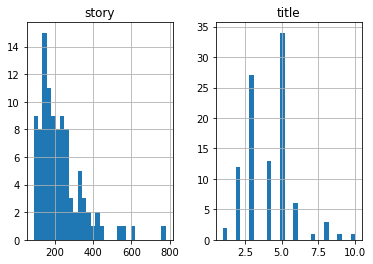

In [11]:
import matplotlib.pyplot as plt
story_word_count = []
title_word_count = []

# populate the lists with sentence lengths
for i in x:
      story_word_count.append(len(i.split()))

for i in y:
      title_word_count.append(len(i.split()))

length_df = pd.DataFrame({'story':story_word_count, 'title':title_word_count})
length_df.hist(bins = 30)
plt.show()

**Splitting the Data**

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [13]:
print(len(x_test))
print(len(y_train))
print(len(y_test))

20
80
20


**Tokenizing**

In [14]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 14.1 MB/s 
     |████████████████████████████████| 182 kB 71.0 MB/s 
     |████████████████████████████████| 7.6 MB 61.1 MB/s 


In [15]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [16]:
 def encoding(t):
  enc = tokenizer.encode(t)
  return enc

In [17]:
#story in encoding
x_enc=[]
for t in x_train:
  x_enc.append(encoding(t))

print(x_enc[5])
x_train=x_enc

x2_enc=[]
for t in x_test:
  x2_enc.append(encoding(t))

x_test=x2_enc

Token indices sequence length is longer than the specified maximum sequence length for this model (647 > 512). Running this sequence through the model will result in indexing errors


[101, 170, 1202, 1162, 1125, 1103, 1940, 1116, 11088, 10038, 1106, 3857, 1141, 1104, 1123, 1257, 1105, 1180, 1136, 1267, 1251, 1141, 8320, 1123, 1113, 1115, 1334, 1177, 1106, 3644, 1251, 5170, 1131, 1579, 1215, 1106, 4877, 1113, 170, 1344, 10801, 1485, 1103, 2343, 1114, 1123, 1839, 2552, 1702, 2019, 1103, 1657, 1118, 1142, 2086, 1131, 1180, 1267, 7747, 1103, 13202, 4685, 1123, 1113, 1657, 1105, 1510, 5742, 1118, 1142, 2086, 1133, 1103, 13202, 1276, 1149, 1115, 1131, 1108, 7198, 1104, 1141, 2552, 1105, 15768, 170, 3499, 5105, 1174, 1223, 1103, 10801, 1187, 1131, 1215, 1106, 4877, 1105, 2046, 1123, 1121, 1103, 2343, 18257, 6104, 1131, 1114, 1123, 5694, 1490, 102]


In [18]:
#story in encoding
y_enc=[]
for t in y_train:
  y_enc.append(encoding(t))

print(y_enc[5])
y_train=y_enc

y2_enc=[]
for t in y_test:
  y2_enc.append(encoding(t))

y_test=y2_enc


[101, 1103, 1113, 7074, 1202, 1162, 102]


In [20]:
max_len_story

4144

In [21]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from keras_preprocessing.sequence import pad_sequences
#padding zero upto maximum length
x_train    =   pad_sequences(x_train,  maxlen=max_len_story, padding='post') 
x_test   =   pad_sequences(x_test, maxlen=max_len_story, padding='post')

x_voc_size   =  len(tokenizer.get_vocab()) +1
x_voc_size

28997

In [23]:
#padding zero upto maximum length
y_train    =   pad_sequences(y_train, maxlen=max_len_story, padding='post')
y_test   =   pad_sequences(y_train, maxlen=max_len_story, padding='post')

y_voc_size  =   len(tokenizer.get_vocab()) +1
y_voc_size

28997

**Building the model**

In [24]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional,Attention,GlobalMaxPooling1D,Dropout
from tensorflow.keras.models import Model

In [25]:
i = Input(shape=(max_len_story, ))
x = Embedding(x_voc_size,124)(i)
x = Dropout(0.2)(x)
x = LSTM(100, return_sequences=True)(x)
x = Dense(100,activation='relu')(x)
x = Dense(y_voc_size,activation='softmax')(x)

model = Model(i,x)

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4144)]            0         
                                                                 
 embedding (Embedding)       (None, 4144, 124)         3595628   
                                                                 
 dropout (Dropout)           (None, 4144, 124)         0         
                                                                 
 lstm (LSTM)                 (None, 4144, 100)         90000     
                                                                 
 dense (Dense)               (None, 4144, 100)         10100     
                                                                 
 dense_1 (Dense)             (None, 4144, 28997)       2928697   
                                                                 
Total params: 6,624,425
Trainable params: 6,624,425
Non-train

In [27]:
history = model.fit(x_train,y_train,epochs=10,validation_split= 0.25,batch_size=1)

Epoch 1/10
60/60 [==============================] - 26s 306ms/step - loss: 3.8176 - accuracy: 0.9787 - val_loss: 0.0156 - val_accuracy: 0.9985
Epoch 2/10
60/60 [==============================] - 18s 299ms/step - loss: 0.0163 - accuracy: 0.9984 - val_loss: 0.0149 - val_accuracy: 0.9985
Epoch 3/10
60/60 [==============================] - 20s 328ms/step - loss: 0.0153 - accuracy: 0.9984 - val_loss: 0.0146 - val_accuracy: 0.9985
Epoch 4/10
60/60 [==============================] - 20s 330ms/step - loss: 0.0146 - accuracy: 0.9984 - val_loss: 0.0143 - val_accuracy: 0.9987
Epoch 5/10
60/60 [==============================] - 20s 331ms/step - loss: 0.0138 - accuracy: 0.9986 - val_loss: 0.0140 - val_accuracy: 0.9987
Epoch 6/10
60/60 [==============================] - 20s 331ms/step - loss: 0.0131 - accuracy: 0.9986 - val_loss: 0.0135 - val_accuracy: 0.9987
Epoch 7/10
60/60 [==============================] - 18s 303ms/step - loss: 0.0120 - accuracy: 0.9986 - val_loss: 0.0127 - val_accuracy: 0.9987

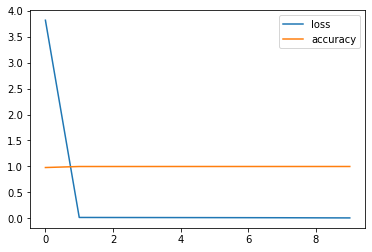

In [28]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='loss') 
pyplot.plot(history.history['accuracy'], label='accuracy') 
pyplot.legend()
pyplot.show()

In [29]:
len(y_test)

80

In [ ]:
y_pred=[]
for t in x_test:
  ypre = model.predict(t.reshape(1,max_len_story))
  y_pred.append(ypre)

1/1 [==============================] - 0s 124ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))